# Basic data analysis

In [1]:
import pandas as pd
import numpy as np
import re
import string
import datetime
import pickle

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.tag import pos_tag

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from textblob import TextBlob
from textblob import Word

from operator import itemgetter
from collections import Counter

import warnings 
warnings.filterwarnings("ignore")

## Loading data

In [2]:
debate_1 = pd.read_pickle('data/debate_1.pkl')
debate_2 = pd.read_pickle('data/debate_2.pkl')

In [3]:
biden1 = debate_1[debate_1.name=='Joe Biden'].reset_index()
trump1 = debate_1[debate_1.name=='Donald Trump'].reset_index()
biden2 = debate_2[debate_2.name=='Joe Biden'].reset_index()
trump2 = debate_2[debate_2.name=='Donald Trump'].reset_index()

## Calculation of candidates' speaking time

In [7]:
print(f'I DEBATE\n\tBiden total speech time: {str(datetime.timedelta(0, biden1.seconds.sum()))}\n\tTrump total speech time: {str(datetime.timedelta(0, trump1.seconds.sum()))}')
print(f'II DEBATE\n\tBiden total speech time: {str(datetime.timedelta(0, biden2.seconds.sum()))}\n\tTrump total speech time: {str(datetime.timedelta(0, trump2.seconds.sum()))}')
print(f'W obu debatach:\n\tBiden total speech time: {str(datetime.timedelta(0, biden1.seconds.sum()+biden2.seconds.sum()))}\n\tTrump total speech time: {str(datetime.timedelta(0, trump1.seconds.sum()+trump2.seconds.sum()))}')

I DEBATE
	Biden total speech time: 0:35:58
	Trump total speech time: 0:34:46
II DEBATE
	Biden total speech time: 0:37:05
	Trump total speech time: 0:39:54
W obu debatach:
	Biden total speech time: 1:13:03
	Trump total speech time: 1:14:40


In [8]:
d1P,d1B,d1T = debate_1[debate_1.name=='Chris Wallace'].seconds.sum(), debate_1[debate_1.name=='Joe Biden'].seconds.sum(),debate_1[debate_1.name=='Donald Trump'].seconds.sum()

In [9]:
d2P,d2B,d2T = debate_2[debate_2.name=='Kristen Welker'].seconds.sum(), debate_2[debate_2.name=='Joe Biden'].seconds.sum(),debate_2[debate_2.name=='Donald Trump'].seconds.sum()

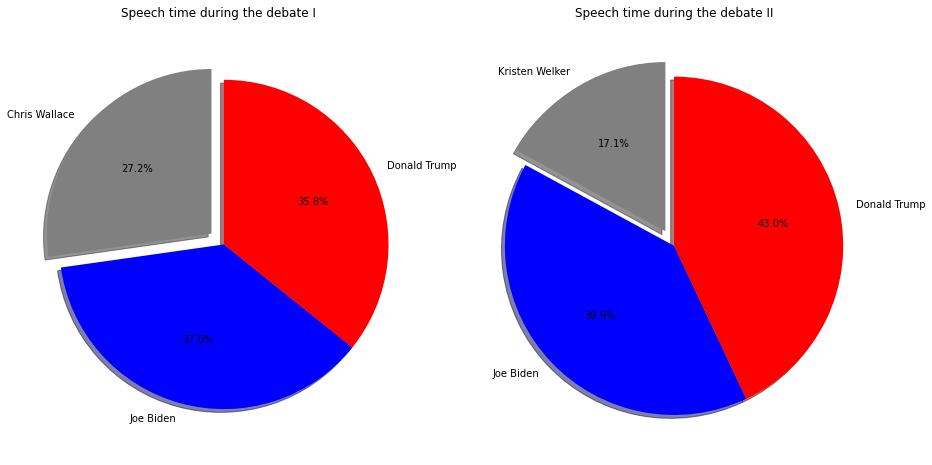

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
fig.set_facecolor("w")

pie_colors = ['grey','blue','red']

labels = 'Chris Wallace', 'Joe Biden', 'Donald Trump'
sizes = [d1P,d1B,d1T]
explode = (0.1, 0, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=pie_colors)
ax1.axis('equal')
ax1.set_title('Speech time during the debate I')

labels = 'Kristen Welker', 'Joe Biden', 'Donald Trump'
sizes = [d2P,d2B,d2T]
explode = (0.1, 0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=pie_colors)
ax2.axis('equal')
ax2.set_title('Speech time during the debate II')

plt.show()

## Number of words and sentences

In [11]:
awb1, awb2 = debate_1[debate_1.name=='Joe Biden']['all_words'].sum(), debate_2[debate_2.name=='Joe Biden']['all_words'].sum()
asb1, asb2 = debate_1[debate_1.name=='Joe Biden']['all_sentences'].sum(), debate_2[debate_2.name=='Joe Biden']['all_sentences'].sum()
awt1, awt2 = debate_1[debate_1.name=='Donald Trump']['all_words'].sum(), debate_2[debate_2.name=='Donald Trump']['all_words'].sum()
ast1, ast2 = debate_1[debate_1.name=='Donald Trump']['all_sentences'].sum(), debate_2[debate_2.name=='Donald Trump']['all_sentences'].sum()

all_words_biden = awb1+awb2
all_words_trump = awt1+awt2
all_sentences_biden = asb1+asb2
all_sentences_trump = ast1+ast2

In [12]:
print(f'''During the debates, Biden uttered {all_sentences_biden} sentences of {all_words_biden} words, of which it was noted:
- in the first debate {asb1} sentences and {awb1} words, 
- in the second debate {asb2} sentencest and {awb2} words.''')
print('')
print(f'''During the debates, Trump uttered {all_sentences_trump} sentences of {all_words_trump} words, of wchich it was noted:
- in the first debate {ast1} sentences and {awt1} words, 
- in the second debate {ast2} sentences and {awt2} words.''')

During the debates, Biden uttered 1191 sentences of 14914 words, of which it was noted:
- in the first debate 660 sentences and 7205 words, 
- in the second debate 531 sentencest and 7709 words.

During the debates, Trump uttered 1552 sentences of 16625 words, of wchich it was noted:
- in the first debate 791 sentences and 8025 words, 
- in the second debate 761 sentences and 8600 words.


In [13]:
cand_1 = debate_1[(debate_1.name=='Donald Trump')|(debate_1.name=='Joe Biden')]
cand_2 = debate_2[(debate_2.name=='Donald Trump')|(debate_2.name=='Joe Biden')]

In [14]:
cand_1.head(3)

,name,time,statement,debate,part,seconds,cross_talk,all_words,all_sentences,color,lemat,clean_text
2,Joe Biden,02:49,"How you doing, man?",1,1,2.0,none,4,1,blue,man,how you doing man
3,Donald Trump,02:51,How are you doing?,1,1,1.0,none,4,1,red,,how are you doing
4,Joe Biden,02:51,I’m well.,1,1,20.0,none,4,1,blue,well,im well


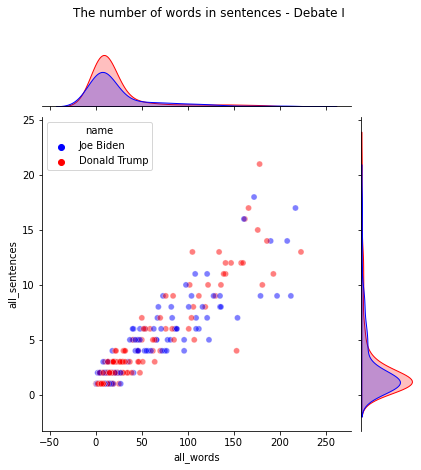

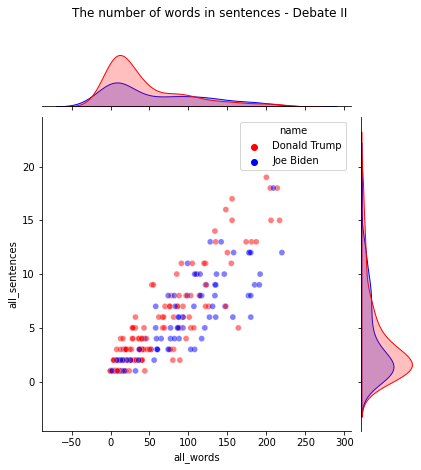

In [16]:
g=sns.jointplot(
    data=cand_1,
    x='all_words', y='all_sentences', hue="name",
    kind="scatter", palette=['blue','red'], alpha=.5, ax=ax1
)
g.fig.suptitle("The number of words in sentences - Debate I", y=1.08)
g=sns.jointplot(
    data=cand_2,
    x='all_words', y='all_sentences', hue="name",
    kind="scatter", palette=['red','blue'], alpha=.5, ax=ax2
)
g.fig.suptitle("The number of words in sentences - Debate II", y=1.08)
plt.show()

In [18]:
dtm1 = pd.read_pickle('data/Debate_DTM_Matrix_1.pkl')
dtm1 = dtm1.transpose()
dtm1.head(3)

,Biden_I,Trump_I,Biden_II,Trump_II,Biden,Trump
abide,0,0,1,0,1,0
ability,2,0,1,1,3,1
able,17,1,16,4,33,5


In [19]:
dtm1.sum()

Biden_I     2779
Trump_I     3065
Biden_II    2986
Trump_II    3313
Biden       5765
Trump       6378
dtype: int64

In [20]:
dtm2 = pd.read_pickle('data/Debate_DTM_Matrix_2gram.pkl')
dtm2 = dtm2.T
dtm2.head(3)

,Biden_I,Trump_I,Biden_II,Trump_II,Biden,Trump
abide agreed,0,0,1,0,1,0
ability lock,0,0,0,1,0,1
ability money,1,0,0,0,1,0


In [21]:
dtm3 = pd.read_pickle('data/Debate_DTM_Matrix_3gram.pkl')
dtm3 = dtm3.T
dtm3.head(3)

,Biden_I,Trump_I,Biden_II,Trump_II,Biden,Trump
abide agreed say,0,0,1,0,1,0
ability lock know,0,0,0,1,0,1
ability money able,1,0,0,0,1,0


In [22]:
data_clean = pd.read_pickle('data/Debate_data_clean.pkl')
data_clean

,transcript,lemat
Biden_I,how you doing man im well well first of all t...,man well well first thank looking forward pres...
Trump_I,how are you doing thank you very much chris i...,thank much chris tell simply election election...
Biden_II,americans dead you hear nothing else i say t...,american dead hear nothing else say tonight he...
Trump_II,how are you doing how are you so as you know ...,know million people modeled expected die close...
Biden,how you doing man im well well first of all t...,man well well first thank looking forward pres...
Trump,how are you doing thank you very much chris i...,thank much chris tell simply election election...


## The most popular words

#### Single words

In [23]:
B1_dtm1 = dtm1.Biden_I.sort_values(ascending=False).head(10)
B2_dtm1 = dtm1.Biden_II.sort_values(ascending=False).head(10)
B_dtm1 = dtm1.Biden.sort_values(ascending=False).head(10)
T1_dtm1 = dtm1.Trump_I.sort_values(ascending=False).head(10)
T2_dtm1 = dtm1.Trump_II.sort_values(ascending=False).head(10)
T_dtm1 = dtm1.Trump.sort_values(ascending=False).head(10)

In [24]:
top_dict = {}
td=[]
for c in dtm1.columns:
    top = dtm1[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [25]:
for candidate, top_words in top_dict.items():
    print(candidate)
    print(', '.join([word for word, count in top_words[0:15]]))
    print('---')

Biden_I
people, going, fact, way, get, vote, deal, look, president, well, know, number, said, make, one
---
Trump_I
people, want, going, know, look, would, said, joe, million, got, think, well, year, say, done
---
Biden_II
going, people, said, fact, make, president, sure, state, china, one, get, know, say, come, american
---
Trump_II
going, people, said, say, year, know, joe, want, million, get, done, money, look, thing, come
---
Biden
going, people, fact, said, president, make, get, way, know, sure, one, look, state, say, american
---
Trump
people, going, want, know, said, look, joe, say, year, would, million, done, got, think, country
---


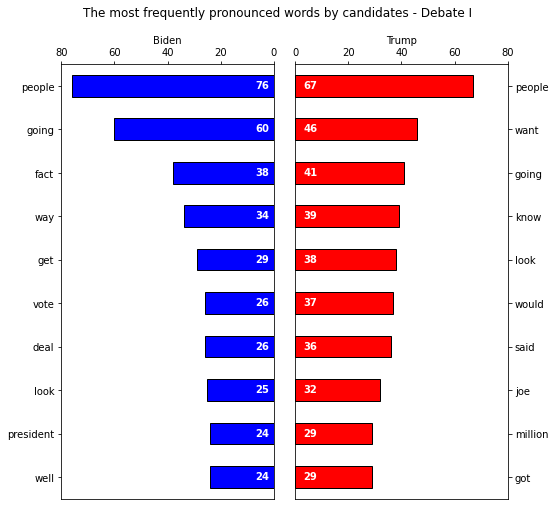

In [26]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B1_dtm1[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 80])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B1_dtm1[::-1]):
    barh_ax.text(7, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T1_dtm1[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 80])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T1_dtm1[::-1]):
    barh_ax.text(3, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced words by candidates - Debate I')
plt.show()

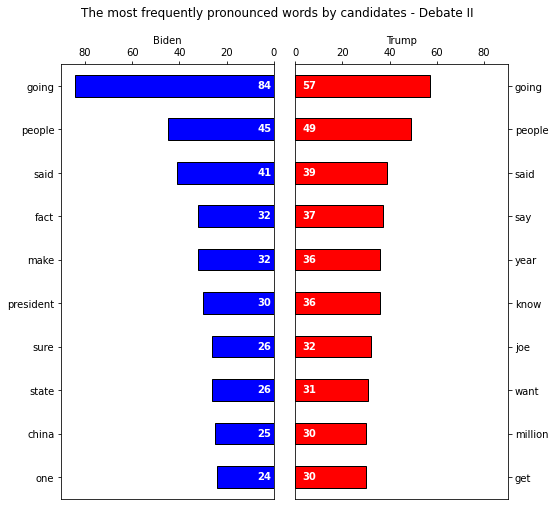

In [27]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B2_dtm1[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 90])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B2_dtm1[::-1]):
    barh_ax.text(7, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T2_dtm1[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 90])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T2_dtm1[::-1]):
    barh_ax.text(3, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced words by candidates - Debate II')
plt.show()

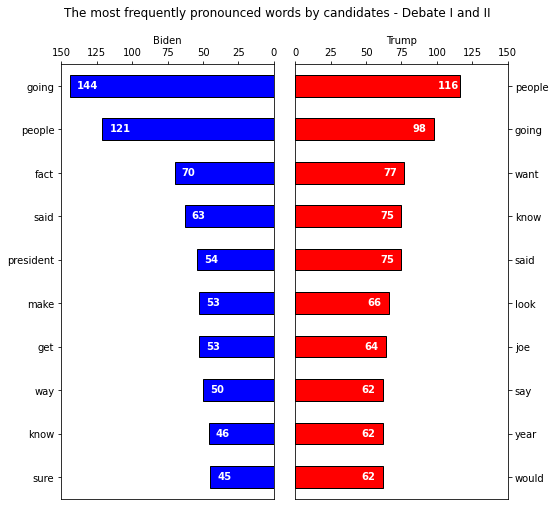

In [28]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B_dtm1[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 150])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B_dtm1[::-1]):
    barh_ax.text(v-5, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T_dtm1[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 150])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T_dtm1[::-1]):
    barh_ax.text(v-15, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced words by candidates - Debate I and II')
plt.show()

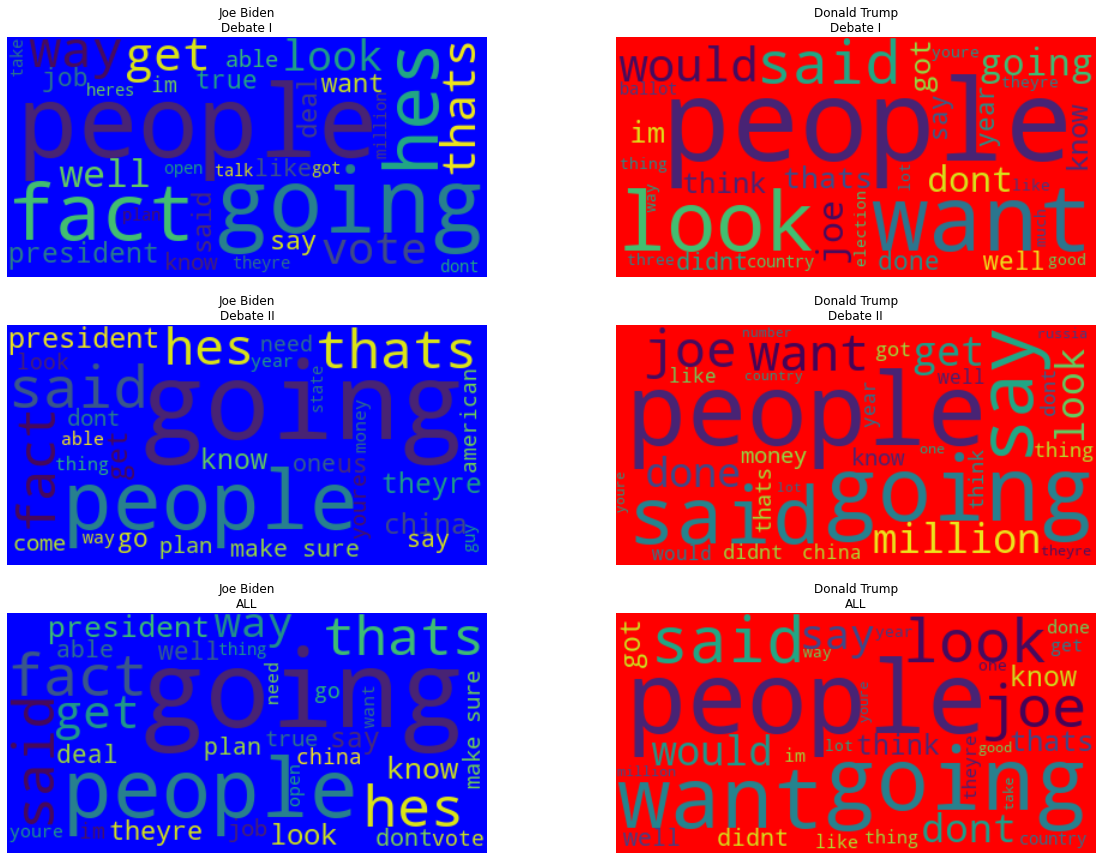

In [29]:
full_names = ['Joe Biden\nDebate I', 'Donald Trump\nDebate I','Joe Biden\nDebate II', 'Donald Trump\nDebate II','Joe Biden\nALL', 'Donald Trump\nALL']
stop_words = stopwords.words('english')
color = ['blue','red','blue','red','blue','red']
plt.rcParams['figure.figsize'] = [20, 15]

for index, candidate in enumerate(dtm1.columns):

    wordcloud = WordCloud(random_state=1, background_color=color[index], max_words=30, stopwords = stop_words).generate(data_clean.transcript[candidate])
   
    plt.subplot(3, 2, index+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

#### Bigrams

In [30]:
B1_dtm2 = dtm2.Biden_I.sort_values(ascending=False).head(10)
B2_dtm2 = dtm2.Biden_II.sort_values(ascending=False).head(10)
B_dtm2 = dtm2.Biden.sort_values(ascending=False).head(10)
T1_dtm2 = dtm2.Trump_I.sort_values(ascending=False).head(10)
T2_dtm2 = dtm2.Trump_II.sort_values(ascending=False).head(10)
T_dtm2 = dtm2.Trump.sort_values(ascending=False).head(10)

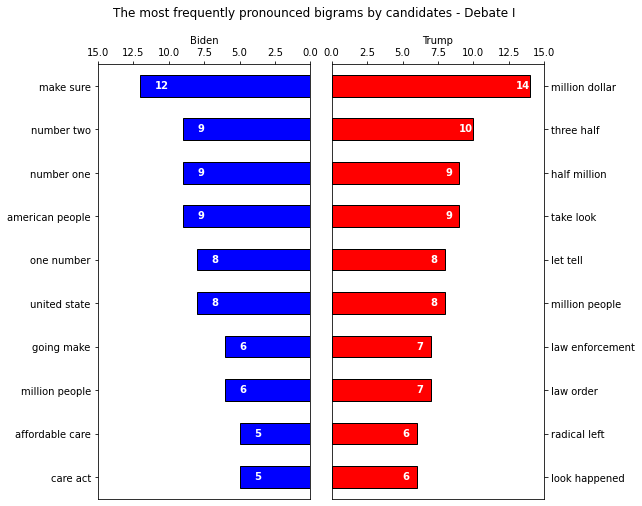

In [31]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B1_dtm2[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 15])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B1_dtm2[::-1]):
    barh_ax.text(v-1, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T1_dtm2[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 15])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T1_dtm2[::-1]):
    barh_ax.text(v-1, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced bigrams by candidates - Debate I')
plt.show()

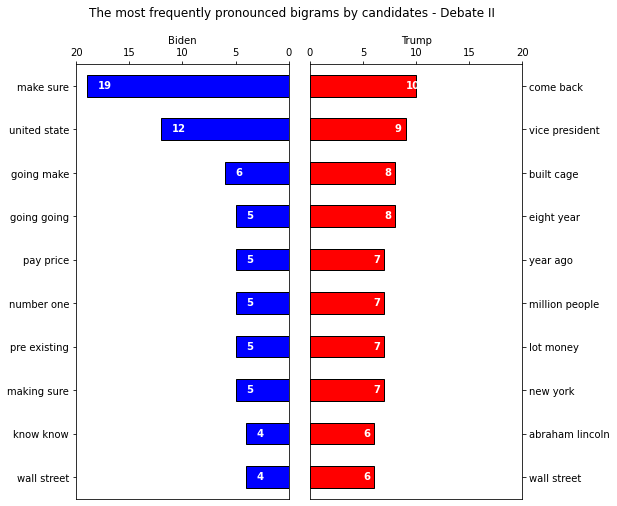

In [32]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B2_dtm2[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 20])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B2_dtm2[::-1]):
    barh_ax.text(v-1, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T2_dtm2[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 20])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T2_dtm2[::-1]):
    barh_ax.text(v-1, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced bigrams by candidates - Debate II')
plt.show()

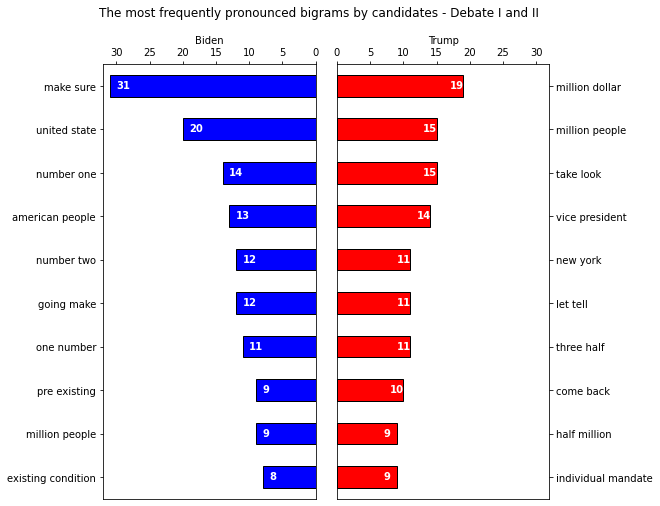

In [33]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B_dtm2[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 32])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B_dtm2[::-1]):
    barh_ax.text(v-1, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T_dtm2[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 32])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T_dtm2[::-1]):
    barh_ax.text(v-2, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced bigrams by candidates - Debate I and II')
plt.show()

In [34]:
top_bigram = {}
for c in dtm2.columns:
    top = dtm2[c].sort_values(ascending=False).head(30)
    top_bigram[c]= list(zip(top.index, top.values))

In [35]:
for candidate, top_big in top_bigram.items():
    print(candidate)
    print(', '.join([word for word, count in top_big[0:15]]))
    print('---')

Biden_I
make sure, number two, number one, american people, one number, united state, going make, million people, affordable care, care act, african american, take care, going build, green new, new deal
---
Trump_I
million dollar, three half, half million, take look, let tell, million people, law enforcement, law order, radical left, look happened, individual mandate, want shut, people would, lot people, vice president
---
Biden_II
make sure, united state, going make, going going, pay price, number one, pre existing, making sure, know know, wall street, private insurance, four year, existing condition, sure get, last time
---
Trump_II
come back, vice president, built cage, eight year, year ago, million people, lot money, new york, abraham lincoln, wall street, get done, one thing, take look, three year, justice reform
---
Biden
make sure, united state, number one, american people, number two, going make, one number, pre existing, million people, existing condition, making sure, preside

#### Trigrams

In [36]:
B1_dtm3 = dtm3.Biden_I.sort_values(ascending=False).head(10)
B2_dtm3 = dtm3.Biden_II.sort_values(ascending=False).head(10)
B_dtm3 = dtm3.Biden.sort_values(ascending=False).head(10)
T1_dtm3 = dtm3.Trump_I.sort_values(ascending=False).head(10)
T2_dtm3 = dtm3.Trump_II.sort_values(ascending=False).head(10)
T_dtm3 = dtm3.Trump.sort_values(ascending=False).head(10)

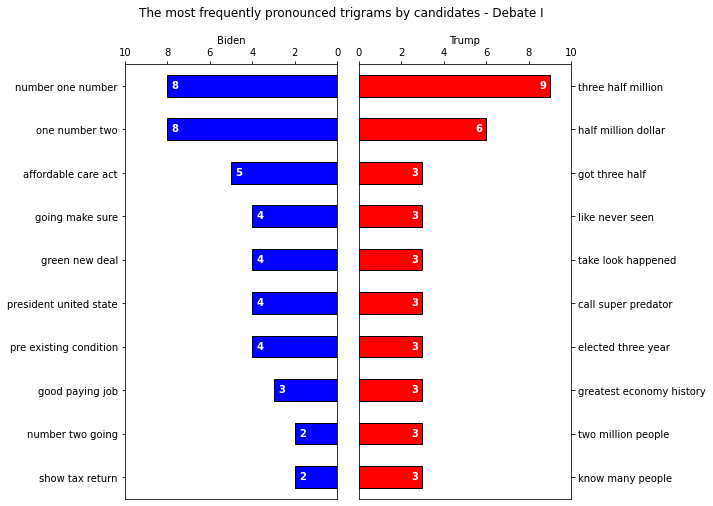

In [37]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B1_dtm3[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 10])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B1_dtm3[::-1]):
    barh_ax.text(v-0.2, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T1_dtm3[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 10])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T1_dtm3[::-1]):
    barh_ax.text(v-0.5, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced trigrams by candidates - Debate I')
plt.show()

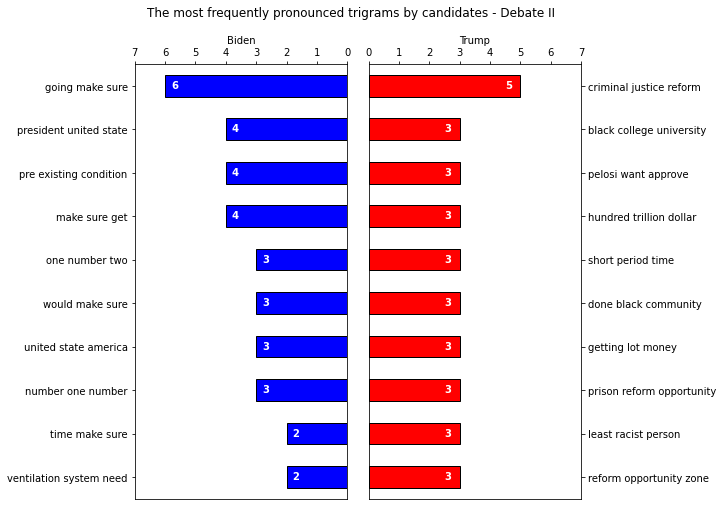

In [38]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B2_dtm3[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 7])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B2_dtm3[::-1]):
    barh_ax.text(v-0.2, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T2_dtm3[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 7])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T2_dtm3[::-1]):
    barh_ax.text(v-0.5, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced trigrams by candidates - Debate II')
plt.show()

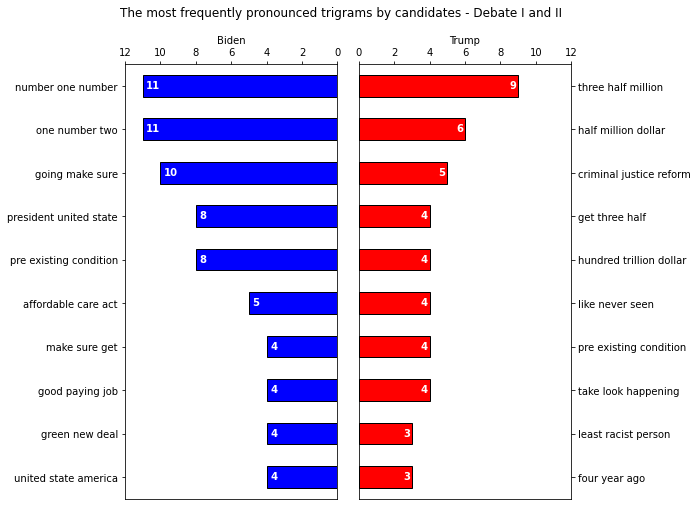

In [39]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,8), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
B_dtm3[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 12])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')
for i, v in enumerate(B_dtm3[::-1]):
    barh_ax.text(v-0.2, i-.05, str(v), color='white', fontweight='bold')

barh_ax = ax[1]
T_dtm3[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 12])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
for i, v in enumerate(T_dtm3[::-1]):
    barh_ax.text(v-0.5, i-.05, str(v), color='white', fontweight='bold')
plt.suptitle('The most frequently pronounced trigrams by candidates - Debate I and II')
plt.show()

In [40]:
top_trigram = {}
for c in dtm3.columns:
    top = dtm3[c].sort_values(ascending=False).head(30)
    top_trigram[c]= list(zip(top.index, top.values))

In [41]:
for candidate, top_big in top_trigram.items():
    print(candidate)
    print(', '.join([word for word, count in top_big[0:10]]))
    print('---')

Biden_I
number one number, one number two, affordable care act, going make sure, green new deal, president united state, pre existing condition, good paying job, number two going, show tax return
---
Trump_I
three half million, half million dollar, got three half, like never seen, take look happened, call super predator, elected three year, greatest economy history, two million people, know many people
---
Biden_II
going make sure, president united state, pre existing condition, make sure get, one number two, would make sure, united state america, number one number, time make sure, ventilation system need
---
Trump_II
criminal justice reform, black college university, pelosi want approve, hundred trillion dollar, short period time, done black community, getting lot money, prison reform opportunity, least racist person, reform opportunity zone
---
Biden
number one number, one number two, going make sure, president united state, pre existing condition, affordable care act, make sure get,

In [43]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# stop words
stop_words = text.ENGLISH_STOP_WORDS.union()

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [44]:
print(text.ENGLISH_STOP_WORDS.union())

frozenset({'since', 'most', 'nothing', 'show', 'one', 'should', 'them', 'before', 'become', 'thin', 'call', 'would', 'these', 'very', 'done', 'take', 'up', 'under', 'are', 'we', 'whenever', 'bill', 'thru', 'otherwise', 'itself', 'him', 'couldnt', 'sixty', 'towards', 'hundred', 'rather', 'who', 'yours', 'its', 'still', 'thereafter', 'co', 'as', 'put', 'do', 'together', 'hereafter', 'into', 'whoever', 'been', 'eg', 'same', 'other', 'behind', 'though', 'again', 'not', 'almost', 'why', 'each', 'among', 'yourself', 'eleven', 'off', 'around', 'i', 'get', 'when', 'us', 'often', 'a', 'none', 'toward', 'some', 'although', 'else', 're', 'were', 'ourselves', 'namely', 'whose', 'whither', 'mill', 'fill', 'four', 'until', 'how', 'themselves', 'against', 'moreover', 'through', 'those', 'an', 'anywhere', 'here', 'is', 'our', 'others', 'made', 'their', 'herein', 'what', 'wherein', 'may', 'thick', 'except', 'me', 'whether', 'nowhere', 'anything', 'somehow', 'everyone', 'cant', 'empty', 'be', 'everythin

In [45]:
len(text.ENGLISH_STOP_WORDS.union())

318

## Number of words

In [47]:
all_words_count = [awb1,awt1,awb2,awt2,awb1+awb2,awt1+awt2]
color = ['blue','red','blue','red','blue','red']

In [48]:
unique_list = []
for candidate in dtm1.columns:
    uniques = dtm1[candidate].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(full_names, unique_list, color, all_words_count)), columns=['candidate', 'unique_words','color','all_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,candidate,unique_words,color,all_words
1,Donald Trump\nDebate I,867,red,8025
3,Donald Trump\nDebate II,943,red,8600
0,Joe Biden\nDebate I,961,blue,7205
2,Joe Biden\nDebate II,1046,blue,7709
5,Donald Trump\nALL,1341,red,16625
4,Joe Biden\nALL,1498,blue,14914


In [49]:
# Words per minute

# all words
total_list = []
for candidate in dtm1.columns:
    totals = sum(dtm1[candidate])
    total_list.append(totals)
    
# minutes
run_times = [36,35,37,40,73,75]
all_words = [awb1,awt1,awb2,awt2,all_words_biden,all_words_trump]

# dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['u_words_per_minute'] = data_words['total_words'] // data_words['run_times']
data_words['all_words'] = all_words
data_words['all_words_per_minute'] = data_words['all_words'] // data_words['run_times']

# sort dataframe
data_wpm_sort = data_words.sort_values(by='u_words_per_minute')
data_wpm_sort

,candidate,unique_words,color,all_words,total_words,run_times,u_words_per_minute,all_words_per_minute
0,Joe Biden\nDebate I,961,blue,7205,2779,36,77,200
4,Joe Biden\nALL,1498,blue,14914,5765,73,78,204
2,Joe Biden\nDebate II,1046,blue,7709,2986,37,80,208
3,Donald Trump\nDebate II,943,red,8600,3313,40,82,215
5,Donald Trump\nALL,1341,red,16625,6378,75,85,221
1,Donald Trump\nDebate I,867,red,8025,3065,35,87,229


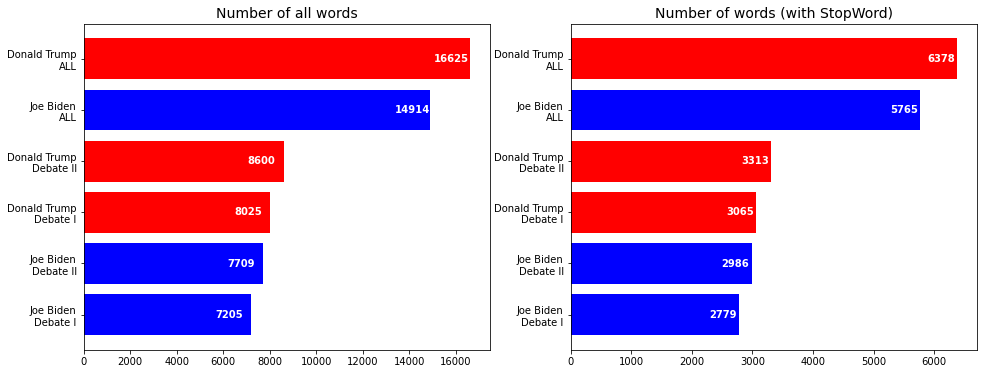

In [50]:
plt.rcParams['figure.figsize'] = [16, 6]

data_tw_sort = data_words.sort_values(by='all_words')

y_pos = np.arange(len(data_words))

ax1 = plt.subplot(1, 2, 1)
plt.barh(y_pos, data_tw_sort.all_words, align='center', color=data_tw_sort.color)
plt.yticks(y_pos, data_tw_sort.candidate)
plt.title('Number of all words', fontsize=14)

for i, v in enumerate(data_tw_sort.all_words):
    ax1.text(v-1550, i-.05, str(v), color='white', fontweight='bold')

data_tw_sort = data_words.sort_values(by='total_words')
ax2 = plt.subplot(1, 2, 2)
plt.barh(y_pos, data_tw_sort.total_words, align='center', color=data_tw_sort.color)
plt.yticks(y_pos, data_tw_sort.candidate)
plt.title('Number of words (with StopWord)', fontsize=14)

for i, v in enumerate(data_tw_sort.total_words):
    ax2.text(v-500, i-.05, str(v), color='white', fontweight='bold')

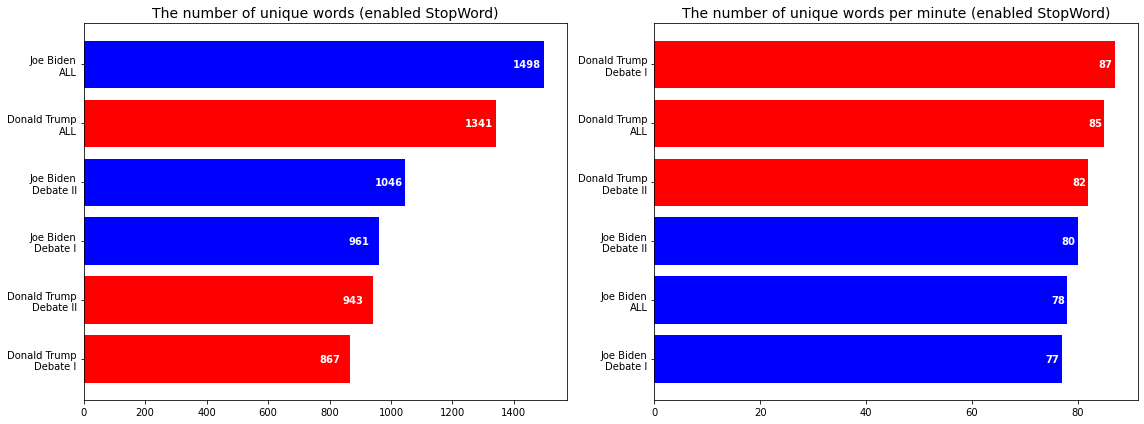

In [51]:
plt.rcParams['figure.figsize'] = [16, 6]

data_unique_sort = data_words.sort_values(by='unique_words')
y_pos = np.arange(len(data_words))

ax1 = plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center', color=data_unique_sort.color)
plt.yticks(y_pos, data_unique_sort.candidate)
plt.title('The number of unique words (enabled StopWord)', fontsize=14)
for i, v in enumerate(data_unique_sort.unique_words):
    ax1.text(v-100, i-.05, str(v), color='white', fontweight='bold')

data_uwpm_sort = data_words.sort_values(by='u_words_per_minute')
ax2 = plt.subplot(1, 2, 2)
plt.barh(y_pos, data_uwpm_sort.u_words_per_minute, align='center', color=data_uwpm_sort.color)
plt.yticks(y_pos, data_wpm_sort.candidate)
plt.title('The number of unique words per minute (enabled StopWord)', fontsize=14)
for i, v in enumerate(data_uwpm_sort.u_words_per_minute):
    ax2.text(v-3, i-.05, str(v), color='white', fontweight='bold')

plt.tight_layout()
plt.show()

#### Part of speech

In [52]:
speech_parts_B_I = Counter([j for i,j in pos_tag(word_tokenize(data_clean.loc['Biden_I','transcript']))])
speech_parts_B_II = Counter([j for i,j in pos_tag(word_tokenize(data_clean.loc['Biden_II','transcript']))])
speech_parts_B = Counter([j for i,j in pos_tag(word_tokenize(data_clean.loc['Biden','transcript']))])
speech_parts_T_I = Counter([j for i,j in pos_tag(word_tokenize(data_clean.loc['Trump_I','transcript']))])
speech_parts_T_II = Counter([j for i,j in pos_tag(word_tokenize(data_clean.loc['Trump_II','transcript']))])
speech_parts_T = Counter([j for i,j in pos_tag(word_tokenize(data_clean.loc['Trump','transcript']))])

In [53]:
B1 = sorted(speech_parts_B_I.items(), key=itemgetter(1),reverse=True)
B2 = sorted(speech_parts_B_II.items(), key=itemgetter(1),reverse=True)
B = sorted(speech_parts_B.items(), key=itemgetter(1),reverse=True)
T1 = sorted(speech_parts_T_I.items(), key=itemgetter(1),reverse=True)
T2 = sorted(speech_parts_T_II.items(), key=itemgetter(1),reverse=True)
T = sorted(speech_parts_T.items(), key=itemgetter(1),reverse=True)

In [54]:
x,y = zip(*B1)

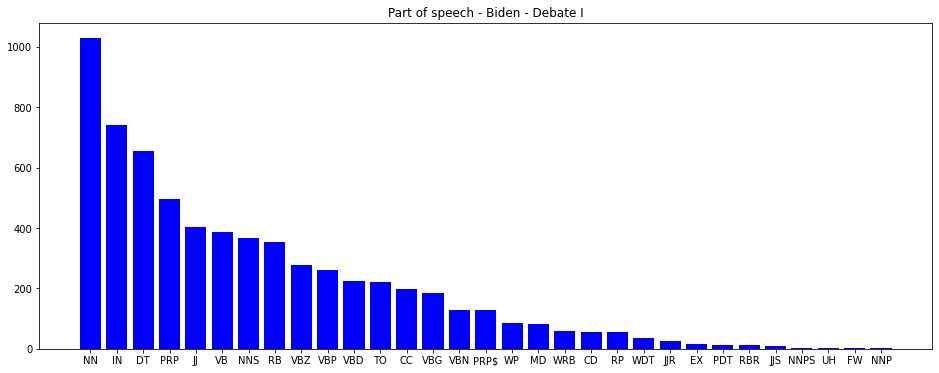

In [55]:
plt.bar(x,y, color='b')
plt.title('Part of speech - Biden - Debate I');

In [56]:
x,y = zip(*B2)

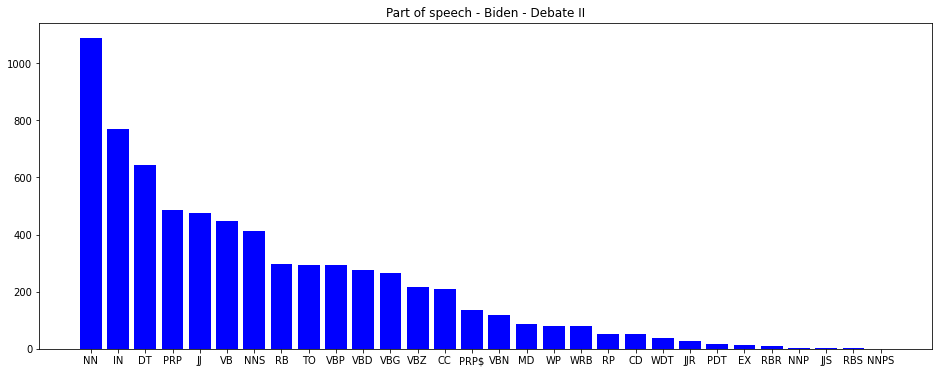

In [57]:
plt.bar(x,y, color='b')
plt.title('Part of speech - Biden - Debate II');

In [58]:
bx,by = zip(*B)

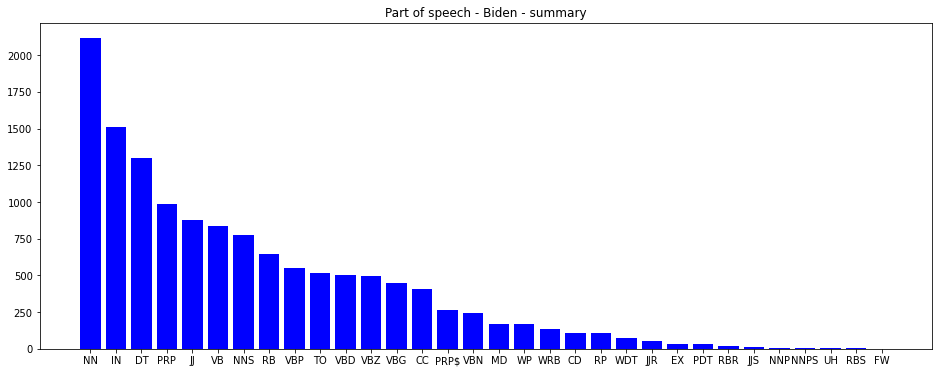

In [59]:
plt.bar(bx,by, color='b')
plt.title('Part of speech - Biden - summary');

In [60]:
x,y = zip(*T1)

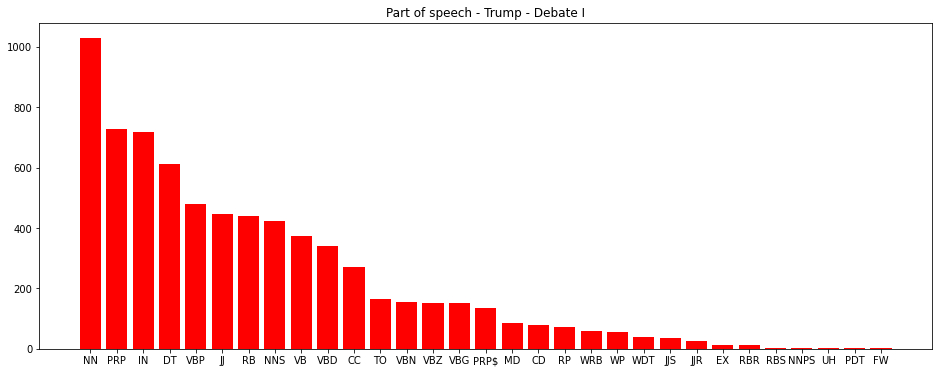

In [61]:
plt.bar(x,y, color='r')
plt.title('Part of speech - Trump - Debate I');

In [62]:
x,y = zip(*T2)

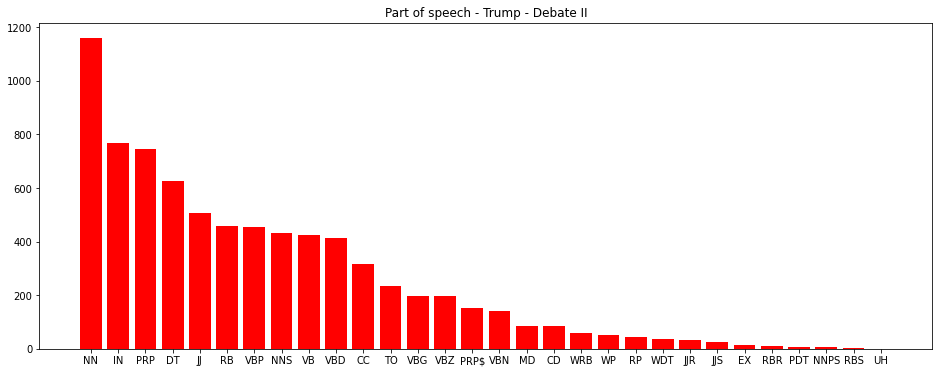

In [63]:
plt.bar(x,y, color='r')
plt.title('Part of speech - Trump - Debate II');

In [64]:
tx,ty = zip(*T)

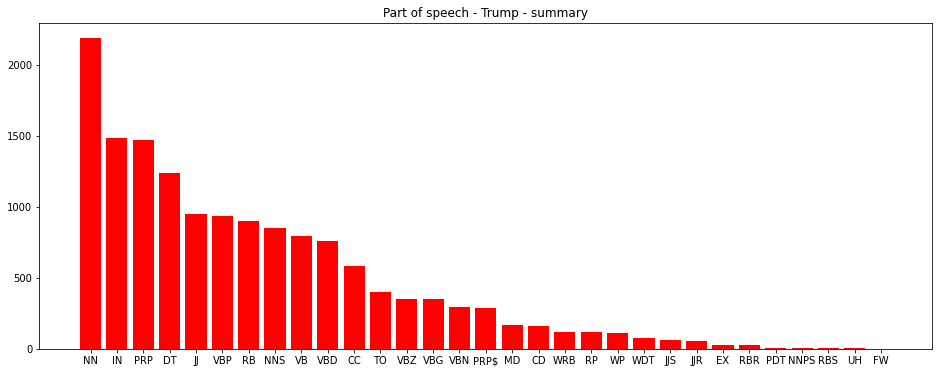

In [65]:
plt.bar(tx,ty, color='r')
plt.title('Part of speech - Trump - summary');

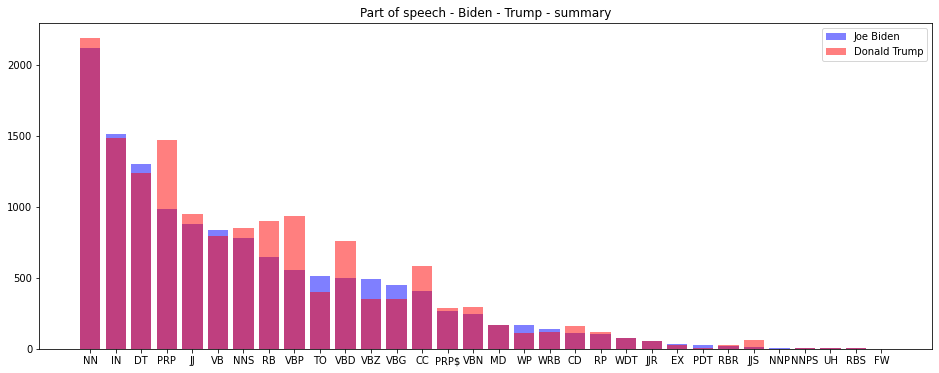

In [66]:
plt.bar(bx,by, color='b',alpha=.5)
plt.bar(tx,ty,color='r',alpha=.5)
plt.legend(['Joe Biden','Donald Trump'])
plt.title('Part of speech - Biden - Trump - summary');